# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Линейная регрессия":

https://clck.ru/32BVWe

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения линейной регрессии
5. Написать уравнение линейной регрессии
6. Визуализировать данные и полученное уравнение линейной регрессии
7. Оценивать полученную модель с помощью MSE, MAE, R2.
8. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

In [23]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np 

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#boston = load_boston()


#print(boston.DESCR)



.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
from google.colab import files
upload = files.upload()

Saving 1.csv to 1 (1).csv


In [88]:
import io
import pandas as pd
pf = pd.read_csv(io.BytesIO(upload['1.csv']))
df = pf[["Temperature (C)", "Humidity"]]
df.columns = ["Temperature","Humidity"]
df

,Temperature,Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83
...,...,...
96448,26.016667,0.43
96449,24.583333,0.48
96450,22.038889,0.56
96451,21.522222,0.60


In [150]:
pf.fillna(method ="ffill", inplace = True)

In [139]:


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (48226, 1), (48226,)
Test dataset size: (48227, 1), (48227,)


In [151]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
import numpy as np 
o = df.drop(['Humidity'],axis=1)
x = np.array(o['Temperature']).reshape((-1,1))
y = df['Humidity']



In [152]:

model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [-0.0129043]
Свободный коэффицент уравнения w0: 0.8896769459868518


In [153]:
np.linalg.inv(x.T@x)@x.T@y

array([0.03248381])

In [154]:
y_pred = model.predict(X_test)

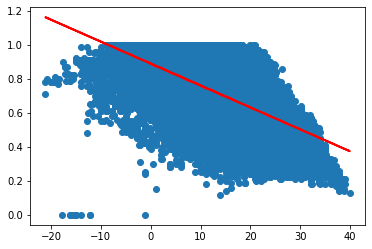

In [155]:

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.show()

In [156]:
from scipy.special import y1p_zeros
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.12182994458610637
Mean Squared Error: 0.02289019120428814
R2 score: 0.39897680616043374


In [162]:

#метрика к единице, следователно высокая кореляция между признаками и ответом
#MSE приближена к единице
b=(y_pred-y_test)**2
b.sum()/4823

0.2288876738978238